In [1]:
from qiskit import *

In [2]:
#create 2Qbit quantum register
qr = QuantumRegister(2)

In [3]:
#create 2 classical bit /Classical Register
cr = ClassicalRegister(2)

In [4]:
#create circuit using both register
circuit = QuantumCircuit(qr, cr) 

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In [7]:
#buikd gate into circuit
#in order to create entanglement first we need to apply Hadamard gate on first qubit

In [8]:
circuit.h(qr[0])

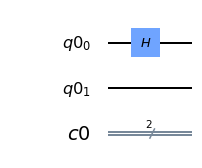

In [9]:
circuit.draw(output='mpl')

In [10]:
circuit.draw() #same as previous

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0_0: ═════
           
c0_1: ═════

In [11]:
#create 2 qubit operation called controlled X
#this 2 qubit operation is like logical if
#quantum version of if this then that 
#apply control on first qubit and target of that operation is 2nd qubit
circuit.cx(qr[0], qr[1])

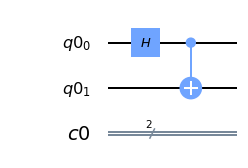

In [12]:
circuit.draw(output='mpl')

In [13]:
#using these 2 operation create entanglement between Q0 and Q0 sub1
#measure the quantum bits and take those measurement and store them into classical bits

In [14]:
circuit.measure(qr, cr)#qr for measuring the qbits in quantum register and cr for #store them into classical register

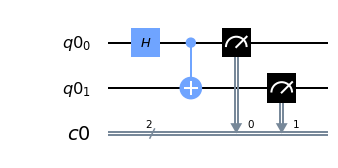

In [15]:
circuit.draw(output = 'mpl')

In [16]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0_0: ═══════════╩══╬═
                    ║ 
c0_1: ══════════════╩═

In [17]:
#Run on Quantum computer and classical computer
#use aer component of qiskit 
#aer component is used for simulation of quantum circuit on local computer

In [18]:
simulator = Aer.get_backend('qasm_simulator') #simulator name QASM Simulator, which comes from quantum assembly language

In [19]:
execute(circuit, backend = simulator)

In [20]:
result = execute(circuit, backend = simulator).result()

In [21]:
from qiskit.tools.visualization import plot_histogram

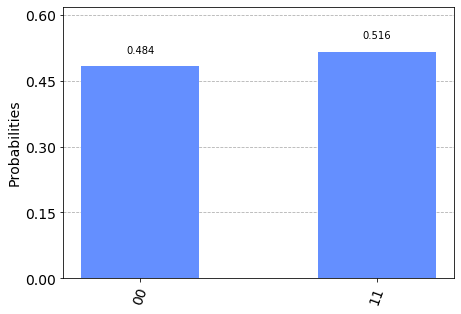

In [22]:
plot_histogram(result.get_counts(circuit))

In [23]:
# these Small errors are beacuse of we're running a limited number of shots on our simulation instead of infinte number of shots

In [24]:
IBMQ.save_account('93b273acaf26c152ecdab02075f1a30b35bbed8a203ede71db8174b69171876553ec52ef6bc93c97e4a720a21fc14b534a8e221bff879c7790c9542df0d013af')

configrc.store_credentials:WARNING:2020-04-22 18:36:29,263: Credentials already present. Set overwrite=True to overwrite.


In [25]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider('ibm-q')

In [27]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [28]:
job = execute(circuit, backend = qcomp)

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result() 

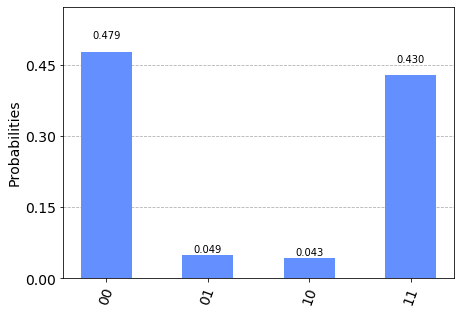

In [34]:
plot_histogram(result.get_counts(circuit))